# Morphology for Single Cells 

This section will serve as an introduction to the Allen Cell Types database. We'll work with the AllenSDK to see what information we can gain about our cells.

First, we'll `import` the CellTypesCache module. This module provides tools to allow us to access information from the Allen Cell Types database. We're passing it a **manifest** filename as well. CellTypesCache will store the data in the path specified by the manifest filename. You can look under cell_types in your directory, and take a look at the file.

(If you're curious, you can see the full source documentation for the core package on the <a href="https://allensdk.readthedocs.io/en/latest/allensdk.core.html">Allen Brain Atlas website</a>.)

<b>Note</b>: In order to run the line below, you need to have the AllenSDK installed. You can find information on how to do that on the Allen SDK <a href="http://alleninstitute.github.io/AllenSDK/install.html">intall guide</a>. 

In [2]:
# This will ensure that the AllenSDK is installed.
# If not, it will install it for you.
try:
    import allensdk
    if allensdk.__version__ == '2.11.2':
        print('allensdk already installed.')
    else: 
        print('incompatible version of allensdk installed')
except ImportError as e:
    !pip install allensdk

allensdk already installed.


In [3]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

# Import Toolkits 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

print('Packages were successfully imported.')

Packages were successfully imported.


## Get Cells

The `get_cells()` method downloads metadata for cells in the database. The database contains human cells and mouse cells. By default, `get_cells()` downloads metata for *all* cells in the database. Alternatively, one can filter out the database to only include cells collected from a certain species.
Look through <a href="https://allensdk.readthedocs.io/en/latest/allensdk.core.cell_types_cache.html">the documentation for the CellTypesCache</a> for more information on the `get_cells` method.

In [4]:
# Download metadata for all cells in the database
all_cells = ctc.get_cells()
all_cells_df = pd.DataFrame(all_cells).set_index('id')
print('Length of dataframe:')
print(len(all_cells_df))
all_cells_df.head()

Length of dataframe:
2333


,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,None,,563340157,left,0.582057
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,None,,319194354,right,0.469578
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,None,,605622695,right,NaN


As you may have noticed already, out current dataframe only contains metadeta about our cells and no information on the morphology of our cells. In order to get information about the morphology of these cells, we need to use the `get_morphology_features()` method on our instance of the cell types cache. We will set the indices to be the `specimen_id` because these ids will align with those in `all_cells_df`.

In [5]:
# Downloads the morphology features and sets up the dataframe all in one line
morphology_df = pd.DataFrame(ctc.get_morphology_features()).set_index('specimen_id')
print('Length of dataframe:')
print(len(morphology_df))
morphology_df.head()

Length of dataframe:
701


,average_bifurcation_angle_local,average_bifurcation_angle_remote,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,hausdorff_dimension,id,max_branch_order,max_euclidean_distance,...,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,total_volume
specimen_id,,,,,,,,,,,,,,,,,,,,,
478107198,82.727781,NaN,0.864267,0.345092,20.723077,0.964510,NaN,491119743,6.0,99.779724,...,136.267522,0.1144,0.1144,0.28,435.740270,False,3D Neuron Reconstruction morphology,1666.082926,1803.875644,167.343086
502367941,82.506680,NaN,0.903890,0.634047,105.277778,0.862183,NaN,546781359,3.0,432.383110,...,370.170045,0.1144,0.1144,0.28,1446.587725,False,3D Neuron Reconstruction morphology,2277.259374,4543.139073,921.571895
515771244,77.536678,NaN,0.863104,0.417929,73.666667,0.926633,NaN,537042261,6.0,373.630444,...,381.015114,0.1144,0.1144,0.28,287.118123,False,3D Neuron Reconstruction morphology,3589.339062,4704.910407,582.285423
561435279,76.583222,NaN,0.900537,0.400396,95.979167,0.942049,NaN,689123605,11.0,943.382549,...,524.550156,0.1144,0.1144,0.28,180.994813,False,3D Neuron Reconstruction morphology,5416.228778,6814.933290,740.722806
591268268,72.019250,NaN,0.873518,0.227626,47.535714,1.000000,NaN,657879305,5.0,186.218009,...,261.459057,0.1144,0.1144,0.28,55.055236,False,3D Neuron Reconstruction morphology,1659.465869,1185.773462,69.144146


Now we have two dataframes, one with the metadata for our cells, indexed by id, and another with the morphology data for all cells, also indexed by id. Usefully, these ids are unique to each cell, meaning we can match them across dataframes.

In [6]:
# Combine our metadata with our morphology data
meta_morph_df = all_cells_df.join(morphology_df)
print('Length of dataframe:')
print(len(meta_morph_df))
meta_morph_df.head()

Length of dataframe:
2366


,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,total_volume
313860745,positive,"[9582.4439484807, 1397.13172221305, 8104.93589...",Mus musculus,Rorb-IRES2-Cre-D;Ai14-168047.01.02.01,5,385,VISp,Rorb-IRES2-Cre,spiny,truncated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313861411,positive,"[8163.71831638966, 737.363292309386, 3757.0401...",Mus musculus,Pvalb-IRES-Cre;Ai14-165172.05.02.01,4,533,VISpm,Pvalb-IRES-Cre,aspiny,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313861539,positive,"[7805.75587107124, 974.54485808898, 3187.22594...",Mus musculus,Pvalb-IRES-Cre;Ai14-165171.06.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313861608,positive,"[9349.44051500564, 1314.78991021449, 3245.6530...",Mus musculus,Pvalb-IRES-Cre;Ai14-165874.04.02.01,5,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,358.994232,0.1144,0.1144,0.28,514.500853,False,3D Neuron Reconstruction morphology,3538.87678,6041.095769,945.09308
313861677,positive,"[8440.72712445293, 861.63534367222, 7873.85645...",Mus musculus,Rorb-IRES2-Cre-D;Ai14-166229.04.01.01,4,385,VISp,Rorb-IRES2-Cre,spiny,truncated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note**: Notice that when we combine our metadata with our morphology data, we get a lot of NaN values in our morphology columns. This is becasue not all cells in our dataset will have morphology data. To only download cells that have morphology data from our database, make sure to specify `require_morphology= True,` when calling `get_cells()`.

In [7]:
# Only download data for cells that have morphology data 
cells_with_morph = pd.DataFrame(ctc.get_cells(require_morphology = True)).set_index('id')
new_df = cells_with_morph.join(morphology_df)
print('Length of dataframe:')
print(len(new_df))
new_df.head()

Length of dataframe:
699


,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,total_volume
313861608,positive,"[9349.44051500564, 1314.78991021449, 3245.6530...",Mus musculus,Pvalb-IRES-Cre;Ai14-165874.04.02.01,5,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,358.994232,0.1144,0.1144,0.28,514.500853,False,3D Neuron Reconstruction morphology,3538.876780,6041.095769,945.093080
313862022,positive,"[9489.24257509068, 1423.65239028148, 2785.4430...",Mus musculus,Scnn1a-Tg2-Cre;Ai14-167081.03.02.01,4,385,VISp,Scnn1a-Tg2-Cre,spiny,intact,...,287.122628,0.1144,0.1144,0.28,268.777679,False,3D Neuron Reconstruction morphology,3498.090031,3523.606841,306.290931
313862167,positive,"[9279.53948496313, 1831.03502009105, 2151.2443...",Mus musculus,Sst-IRES-Cre;Ai14-167638.05.02.01,4,409,VISl,Sst-IRES-Cre,aspiny,NA,...,327.150383,0.1144,0.1144,0.28,361.118559,False,3D Neuron Reconstruction morphology,2644.878298,3883.698604,512.836253
313862167,positive,"[9279.53948496313, 1831.03502009105, 2151.2443...",Mus musculus,Sst-IRES-Cre;Ai14-167638.05.02.01,4,409,VISl,Sst-IRES-Cre,aspiny,NA,...,327.150383,0.1144,0.1144,0.28,361.118559,True,3D Neuron Reconstruction morphology,2644.878347,3883.699514,512.835043
313862306,positive,"[8976.63502144556, 1878.14058922573, 8881.4968...",Mus musculus,Sst-IRES-Cre;Ai14-167636.04.01.01,6a,385,VISp,Sst-IRES-Cre,aspiny,NA,...,242.781213,0.1144,0.1144,0.28,94.306278,False,3D Neuron Reconstruction morphology,2502.160541,1994.902243,141.878464


The Cell Types Database also contains 3D reconstructions of neuronal morphologies. You can create these single cell reconstructions by exectuing the `get_recontruction()` method on your instance of the cells type cache. To do so, you must specify what cell you want to recontruct by inputing a `specimen_id`. This method returns a class instance with methods for accessing morphology compartments. 

**Note**: Not all cells will have data for a 3D resonstruction. To only download cells that have cell reconstructions, make sure to specify `require_reconstruction = True,` when calling `get_cells()`.

In [8]:
# Select a cell
sid = 313862022

# Call for recontruction of desired cell
single_cell_morphology = ctc.get_reconstruction(specimen_id = sid)

# Get summary of cell reconstruction 
single_cell_morphology.soma

{'id': 0,
 'type': 1,
 'x': 272.844,
 'y': 535.1632,
 'z': 25.2,
 'radius': 7.2343,
 'parent': -1,
 'tree_id': 0,
 'children': [1, 1373, 1787, 1995, 2020, 2326, 2341, 2519, 2636]}

We now have a dictionary of our cell reconstruction. Note that the type field refers to the type of neuronal compartment. The values can be 1 for the soma, 2 for the axon, 3 for dendrites, and 4 for apical dendrites (if present). The x, y, and z, represent the spatial location of the cell soma. 

Morphologies now also come with marker files, which contains points of interest in the reconstruction. The marker file contains locations where dendrites have been truncated due to slicing and when axons were not reconstructed. The `name` field indicates the type of marker (10 for dendrite truncation, 20 for no reconstruction).

In [9]:
# Download and store markers for 3D reconstruction 
markers = ctc.get_reconstruction_markers(sid) 
markers

[{'x': 340.4681, 'y': 518.8189, 'z': 15.809600000000001, 'name': 10},
 {'x': 344.6735, 'y': 520.6732999999999, 'z': 15.809600000000001, 'name': 10},
 {'x': 337.7145, 'y': 529.7085999999999, 'z': 17.871599999999997, 'name': 10},
 {'x': 398.90590000000003, 'y': 575.1425999999999, 'z': 16.497, 'name': 10},
 {'x': 313.41020000000003,
  'y': 556.1361999999999,
  'z': 15.809600000000001,
  'name': 10},
 {'x': 308.4647, 'y': 572.1247, 'z': 16.497, 'name': 10},
 {'x': 250.4216, 'y': 555.7552, 'z': 16.24, 'name': 10},
 {'x': 258.5795, 'y': 564.4485, 'z': 21.973799999999997, 'name': 10},
 {'x': 272.38640000000004, 'y': 487.57280000000003, 'z': 17.36, 'name': 10},
 {'x': 278.7928, 'y': 489.8608, 'z': 15.120000000000001, 'name': 10},
 {'x': 246.0744, 'y': 466.5358, 'z': 20.16, 'name': 10},
 {'x': 282.08750000000003, 'y': 518.2583, 'z': 17.1844, 'name': 10},
 {'x': 267.426, 'y': 565.2836, 'z': 22.6834, 'name': 10},
 {'x': 332.9177, 'y': 523.6419999999999, 'z': 21.3086, 'name': 10},
 {'x': 373.4325,

We can use this data to draw lines between each node and all its children to get a drawing of the cell. We'll reconstruct an image from the front and side view of our cell.

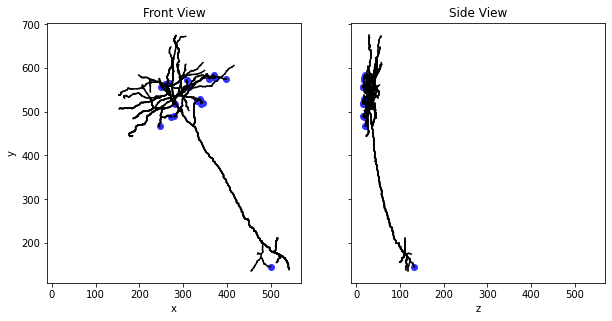

In [10]:
# Import necessary toolboxes
from allensdk.core.swc import Marker

# Set up our plot
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,10))
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Make a line drawing of x-y and y-z views
for n in single_cell_morphology.compartment_list:
    for c in single_cell_morphology.children_of(n):
        axes[0].plot([n['x'], c['x']], [n['y'], c['y']], color='black')
        axes[1].plot([n['z'], c['z']], [n['y'], c['y']], color='black')

# Cut dendrite markers
dm = [ m for m in markers if m['name'] == Marker.CUT_DENDRITE ]
axes[0].scatter([m['x'] for m in dm], [m['y'] for m in dm], color='#3333ff')
axes[1].scatter([m['z'] for m in dm], [m['y'] for m in dm], color='#3333ff')

# No reconstruction markers
nm = [ m for m in markers if m['name'] == Marker.NO_RECONSTRUCTION ]
axes[0].scatter([m['x'] for m in nm], [m['y'] for m in nm], color='#333333')
axes[1].scatter([m['z'] for m in nm], [m['y'] for m in nm], color='#333333')
axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[1].set_xlabel('z')
axes[0].set_title('Front View')
axes[1].set_title('Side View')

# Show the plot
plt.show()